##Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

In [4]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv("/content/dt.csv")
data_encode = pd.read_csv("/content/dt_encode.csv")



---



---



#XRD
X-ray diffraction (XRD) which is based on constructive interference of X-rays and a crystal sample, is a non-destructive technique that determines the crystallographic structure of materials. XRD pattern is a graph of the intensity of X-rays scattered versus the angle at which they are scattered
#PL
Photoluminescence spectroscopy, often referred to as PL, is when light energy, or photons, stimulate the emission of a photon from any matter.
#UV
UV-Vis spectroscopy is an analytical technique that measures the amount of discrete wavelengths of UV or visible light that are absorbed.

#**Features:**
*   **DROP**

###XRD Parameters:
*   **FWHM:** Full width at half maximum
*   **Peak Positon(P):** The angle at which the diffraction peak occurs
*   **Intensity(int):** The height of a peak in the XRD pattern
*   **Relative Intensity(rel_int):** The ratio of the intensity of each peak to the intensity of the largest peak
*   **rel_FWHM:** The ratio of the FWHM of each peak to the FWHM of the largest peak
*   **dislocation density(ds):** The inverse of the square of the Scherrer width

###PL Parameters:
*   **PL_intensity:** First and second peak intensity
*   **PL_fwhm:** First and second peak FWHM
*   **PL_peak_position:** The position of the first and second peaks
*   **PL_relative_intensity:** The ratio of intensity of each peak to the intensity of the largest peak
*   **Bandgap:** The energy difference that is present between the top of the valence band and the bottom of the conduction band

###UV Parameter:
*   **Urbach Energy**

# **Target:**


*   **FF:** Fill Factor
*   **Isc:** current short circuit




---



---



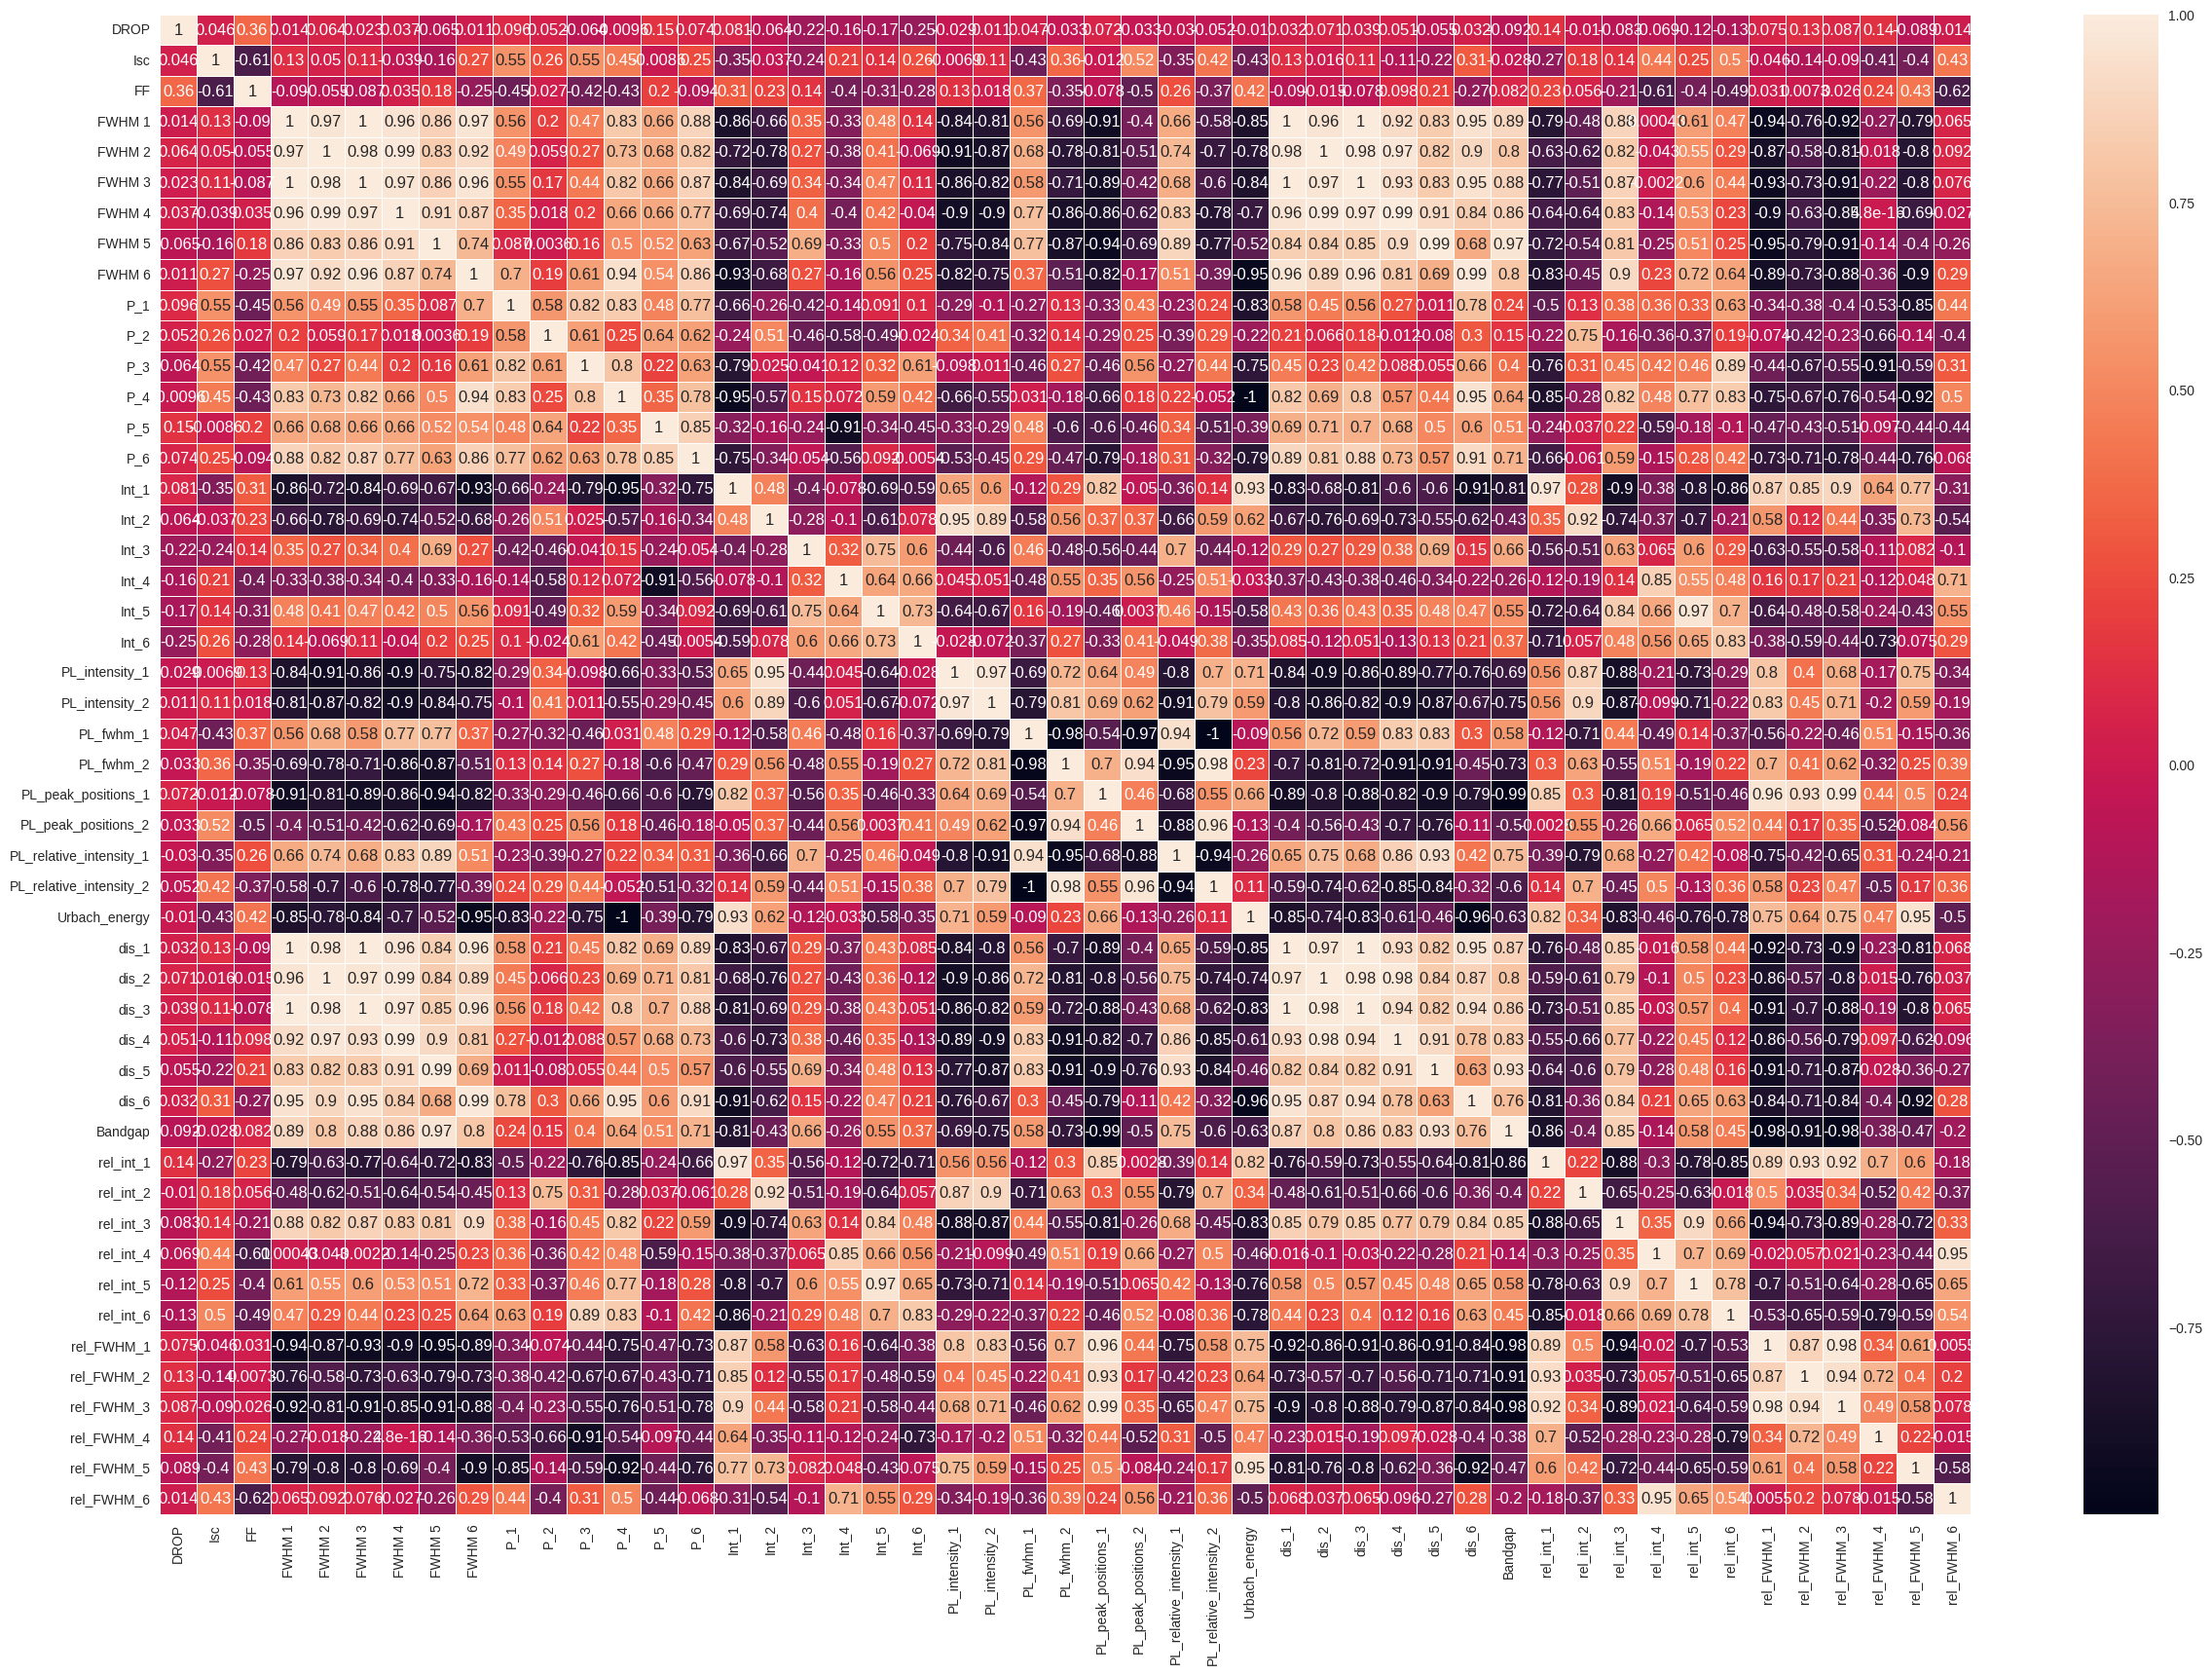

In [66]:
#correlation between features and targets
plt.subplots(figsize=(30, 20))
sns.heatmap(data.corr(), annot=True, linewidths=.7)
plt.show()



---



---



#Pycaret

In [ ]:
!pip install pycaret[full]

**Target**: FF

⚡ Only XRD parameters

In [73]:
from pycaret.regression import *
s = setup(data, target = 'FF',  train_size = 0.8, session_id = 1543 ,fold=3,
          ignore_features=['Isc','PL_intensity_1','PL_intensity_2','PL_fwhm_1',
                           'PL_fwhm_2','PL_peak_positions_1','PL_peak_positions_2',
                           'PL_relative_intensity_1','PL_relative_intensity_2',
                           'Urbach_energy','Bandgap'])

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 49)"
4,Transformed data shape,"(27, 38)"
5,Transformed train set shape,"(21, 38)"
6,Transformed test set shape,"(6, 38)"
7,Ignore features,11
8,Numeric features,37
9,Preprocess,True


In [74]:
best = compare_models(cross_validation= False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3736,0.2673,0.5170,0.9618,0.0111,0.0084,0.0900
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0200
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.3000
rf,Random Forest Regressor,0.9174,1.2093,1.0997,0.8272,0.0260,0.0220,0.1900
ada,AdaBoost Regressor,1.1950,1.4656,1.2106,0.7905,0.0273,0.0278,0.1400
et,Extra Trees Regressor,1.1471,1.4997,1.2246,0.7857,0.0278,0.0268,0.1900
lr,Linear Regression,1.2533,2.2228,1.4909,0.6823,0.0340,0.0293,0.0100
ridge,Ridge Regression,1.3081,2.4383,1.5615,0.6515,0.0355,0.0306,0.0100
huber,Huber Regressor,1.4011,2.7382,1.6548,0.6087,0.0374,0.0326,0.0400
knn,K Neighbors Regressor,1.3719,3.2004,1.7890,0.5426,0.0421,0.0331,0.0200


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [8]:
gbr = create_model('gbr',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.3736,0.2673,0.5170,0.9618,0.0111,0.0084
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

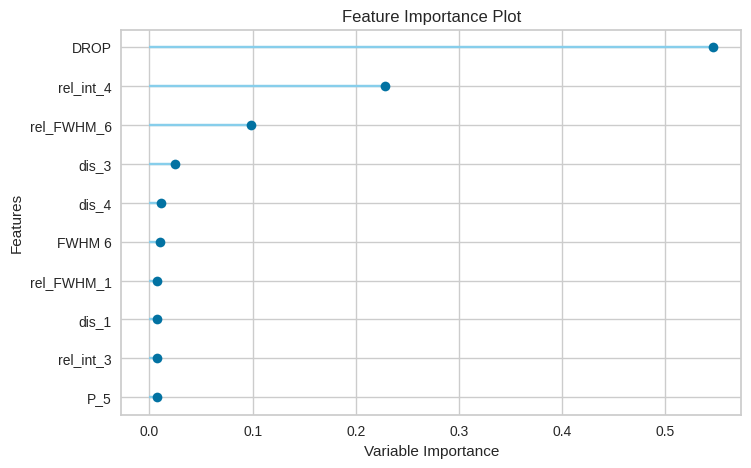

In [9]:
plot_model(gbr, plot = 'feature')



---



⚡ Only XRD parameters & without rel_FWHM

In [10]:
from pycaret.regression import *
s = setup(data, target = 'FF',  train_size = 0.8, session_id = 1543 ,fold=3,
          ignore_features=['Isc','PL_intensity_1','PL_intensity_2','PL_fwhm_1',
                           'PL_fwhm_2','PL_peak_positions_1','PL_peak_positions_2',
                           'PL_relative_intensity_1','PL_relative_intensity_2',
                           'Urbach_energy','Bandgap','rel_FWHM_1','rel_FWHM_2',
                           'rel_FWHM_3','rel_FWHM_4','rel_FWHM_5','rel_FWHM_6'])


,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 49)"
4,Transformed data shape,"(27, 32)"
5,Transformed train set shape,"(21, 32)"
6,Transformed test set shape,"(6, 32)"
7,Ignore features,17
8,Numeric features,31
9,Preprocess,True


In [11]:
best = compare_models(cross_validation= False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4056,0.2949,0.5430,0.9579,0.0116,0.0091,0.0700
ada,AdaBoost Regressor,0.9020,0.8735,0.9346,0.8752,0.0208,0.0208,0.0900
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0200
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.0600
rf,Random Forest Regressor,0.8851,1.2014,1.0961,0.8283,0.0260,0.0213,0.3000
lr,Linear Regression,1.2538,2.2227,1.4909,0.6823,0.0340,0.0293,0.0200
et,Extra Trees Regressor,1.4247,2.3019,1.5172,0.6710,0.0352,0.0336,0.1500
ridge,Ridge Regression,1.3245,2.5183,1.5869,0.6401,0.0360,0.0309,0.0200
huber,Huber Regressor,1.4011,2.7383,1.6548,0.6086,0.0374,0.0326,0.0900
knn,K Neighbors Regressor,1.3719,3.2004,1.7890,0.5426,0.0421,0.0331,0.0300


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [12]:
gbr = create_model('gbr',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4056,0.2949,0.5430,0.9579,0.0116,0.0091
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
gb = gbr.feature_importances_
df = pd.DataFrame({'importance':gb})
df.sort_values(by='importance',ascending=False,inplace=True)
df

,importance
0,0.546479
28,0.326888
20,0.013979
6,0.011657
29,0.010397
12,0.009999
2,0.009976
8,0.009165
5,0.005595
30,0.005038


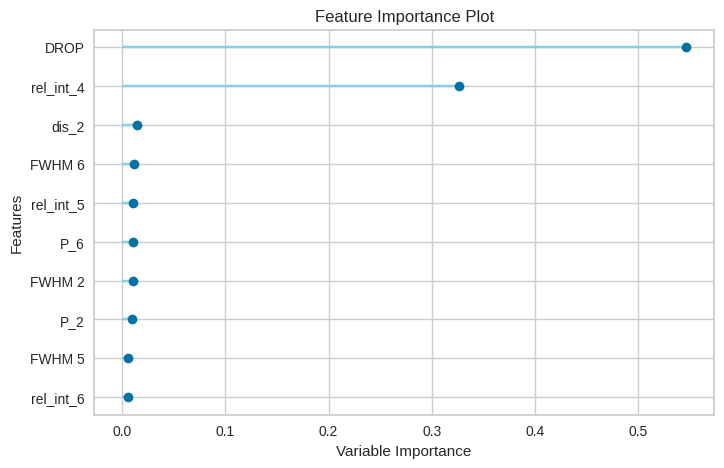

In [14]:
plot_model(gbr, plot = 'feature')



---



⚡ Only PL parameters

In [19]:
from pycaret.regression import *
s = setup(data, target = 'FF',  train_size = 0.8, session_id = 1543 ,fold=3,
          ignore_features=['Isc','FWHM 1','FWHM 2','FWHM 3','FWHM 4','FWHM 5',
                           'FWHM 6','P_1','P_2','P_3','P_4','P_5','P_6','Int_1',
                           'Int_2','Int_3','Int_4','Int_5','Int_6','rel_int_1',
                           'rel_int_2','rel_int_3','rel_int_4','rel_int_5',
                           'rel_int_6','rel_FWHM_1','rel_FWHM_2','rel_FWHM_3',
                           'rel_FWHM_4','rel_FWHM_5','rel_FWHM_6','Urbach_energy',
                           'dis_1','dis_2','dis_3','dis_3','dis_4','dis_5','dis_6'])

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 49)"
4,Transformed data shape,"(27, 11)"
5,Transformed train set shape,"(21, 11)"
6,Transformed test set shape,"(6, 11)"
7,Ignore features,39
8,Numeric features,10
9,Preprocess,True


In [20]:
best = compare_models(cross_validation= False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4640,0.3933,0.6271,0.9438,0.0135,0.0105,0.0600
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0100
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.0400
ada,AdaBoost Regressor,1.0163,1.1041,1.0508,0.8422,0.0237,0.0237,0.0900
rf,Random Forest Regressor,1.0828,1.4346,1.1977,0.7950,0.0281,0.0259,0.1900
et,Extra Trees Regressor,1.2774,1.9514,1.3969,0.7211,0.0317,0.0298,0.1500
ridge,Ridge Regression,1.2508,2.2134,1.4878,0.6837,0.0340,0.0293,0.0100
lar,Least Angle Regression,1.2535,2.2227,1.4909,0.6823,0.0340,0.0293,0.0100
lr,Linear Regression,1.2652,2.2421,1.4974,0.6796,0.0342,0.0296,0.0200
en,Elastic Net,1.1757,2.3983,1.5486,0.6572,0.0362,0.0282,0.0200


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [23]:
gbr = create_model('gbr',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4640,0.3933,0.6271,0.9438,0.0135,0.0105
Train,0.1081,0.0166,0.1289,0.9968,0.0029,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

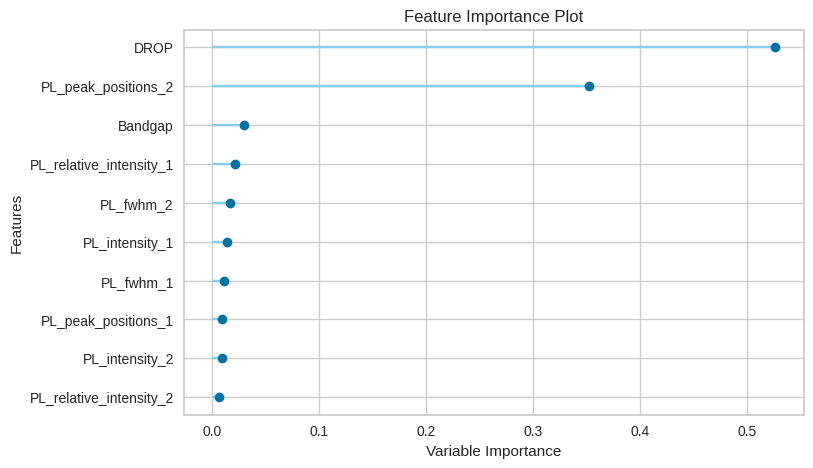

In [24]:
plot_model(gbr, plot = 'feature')



---



⚡ Only relative parameters

In [25]:
from pycaret.regression import *
s = setup(data, target = 'FF',  train_size = 0.8, session_id = 1543 ,fold=3,ignore_features=
 ['Isc','FWHM 1','FWHM 2','FWHM 3','FWHM 4','FWHM 5','FWHM 6','Int_1','Int_2','Int_3','Int_4','Int_5','Int_6','Urbach_energy',
  'PL_intensity_1','PL_intensity_2'])

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 49)"
4,Transformed data shape,"(27, 33)"
5,Transformed train set shape,"(21, 33)"
6,Transformed test set shape,"(6, 33)"
7,Ignore features,16
8,Numeric features,32
9,Preprocess,True


In [35]:
best = compare_models(cross_validation= False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3963,0.2847,0.5336,0.9593,0.0115,0.0089,0.0800
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0200
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.0700
rf,Random Forest Regressor,0.9555,1.1989,1.0949,0.8287,0.0259,0.0229,0.2000
ada,AdaBoost Regressor,1.1531,1.4692,1.2121,0.7900,0.0273,0.0268,0.1100
et,Extra Trees Regressor,1.2614,1.8697,1.3674,0.7328,0.0314,0.0296,0.1600
ridge,Ridge Regression,1.2517,2.2125,1.4875,0.6838,0.0340,0.0293,0.0200
lr,Linear Regression,1.2522,2.2179,1.4892,0.6830,0.0340,0.0293,0.0400
en,Elastic Net,1.1716,2.3621,1.5369,0.6624,0.0359,0.0281,0.0300
huber,Huber Regressor,1.4011,2.7382,1.6548,0.6087,0.0374,0.0326,0.0400


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [36]:
gbr = create_model('gbr',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.3963,0.2847,0.5336,0.9593,0.0115,0.0089
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

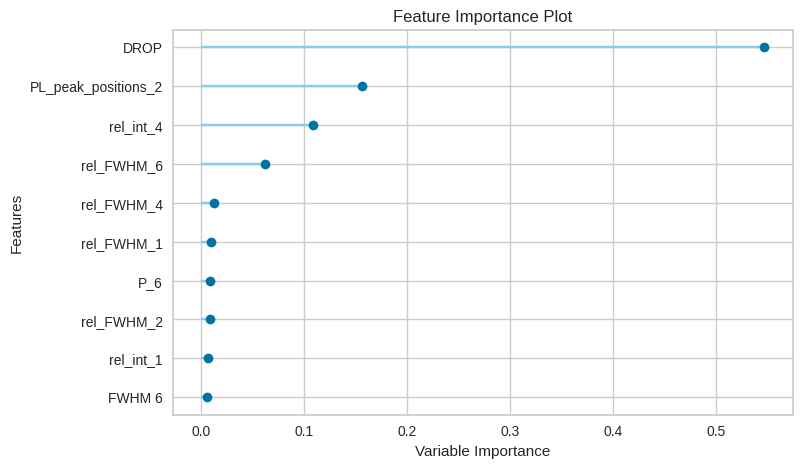

In [37]:
plot_model(gbr, plot = 'feature')



---



⚡ get all features

In [40]:
from pycaret.regression import *
s = setup(data, target = 'FF',  train_size = 0.8, session_id = 1543 ,fold=3,ignore_features=['Isc'])

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 49)"
4,Transformed data shape,"(27, 48)"
5,Transformed train set shape,"(21, 48)"
6,Transformed test set shape,"(6, 48)"
7,Ignore features,1
8,Numeric features,47
9,Preprocess,True


In [41]:
best = compare_models(cross_validation= False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3963,0.2847,0.5336,0.9593,0.0115,0.0089,0.1000
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0200
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.4200
rf,Random Forest Regressor,0.9555,1.1989,1.0949,0.8287,0.0259,0.0229,0.1900
ada,AdaBoost Regressor,1.1531,1.4692,1.2121,0.7900,0.0273,0.0268,0.1400
et,Extra Trees Regressor,1.2614,1.8697,1.3674,0.7328,0.0314,0.0296,0.1600
ridge,Ridge Regression,1.2517,2.2125,1.4875,0.6838,0.0340,0.0293,0.0200
lr,Linear Regression,1.2522,2.2179,1.4892,0.6830,0.0340,0.0293,0.0200
en,Elastic Net,1.1716,2.3621,1.5369,0.6624,0.0359,0.0281,0.0300
huber,Huber Regressor,1.4011,2.7382,1.6548,0.6087,0.0374,0.0326,0.0500


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [42]:
gbr = create_model('gbr',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.3963,0.2847,0.5336,0.9593,0.0115,0.0089
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

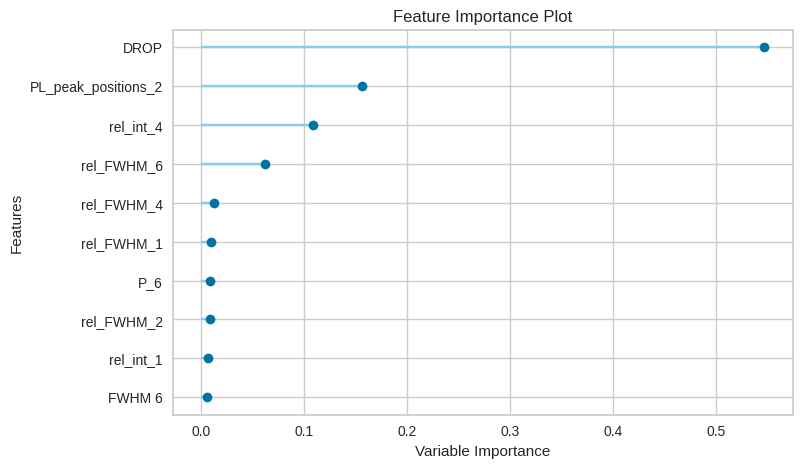

In [43]:
plot_model(gbr, plot = 'feature')



---



⚡ ignor some features

In [44]:
from pycaret.regression import *
s = setup(data, target = 'FF',  train_size = 0.8, session_id = 1543 ,fold=3,
          ignore_features=['Isc','rel_FWHM_1','rel_FWHM_1','rel_FWHM_2',
                           'rel_FWHM_3','rel_FWHM_4','rel_FWHM_5','rel_FWHM_6'])

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 49)"
4,Transformed data shape,"(27, 42)"
5,Transformed train set shape,"(21, 42)"
6,Transformed test set shape,"(6, 42)"
7,Ignore features,8
8,Numeric features,41
9,Preprocess,True


In [45]:
best = compare_models(cross_validation= False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4332,0.3113,0.5580,0.9555,0.0120,0.0097,0.0600
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0200
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.0700
rf,Random Forest Regressor,0.8849,1.2128,1.1013,0.8267,0.0261,0.0213,0.2000
ada,AdaBoost Regressor,1.2176,1.6136,1.2703,0.7694,0.0285,0.0283,0.0800
et,Extra Trees Regressor,1.2743,1.9576,1.3992,0.7202,0.0323,0.0299,0.1400
ridge,Ridge Regression,1.2486,2.2078,1.4859,0.6845,0.0339,0.0292,0.0100
lr,Linear Regression,1.2600,2.2249,1.4916,0.6820,0.0341,0.0295,0.0200
en,Elastic Net,1.1716,2.3621,1.5369,0.6624,0.0359,0.0281,0.0200
huber,Huber Regressor,1.4011,2.7382,1.6548,0.6087,0.0374,0.0326,0.0600


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [46]:
gbr = create_model('gbr',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4332,0.3113,0.5580,0.9555,0.0120,0.0097
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

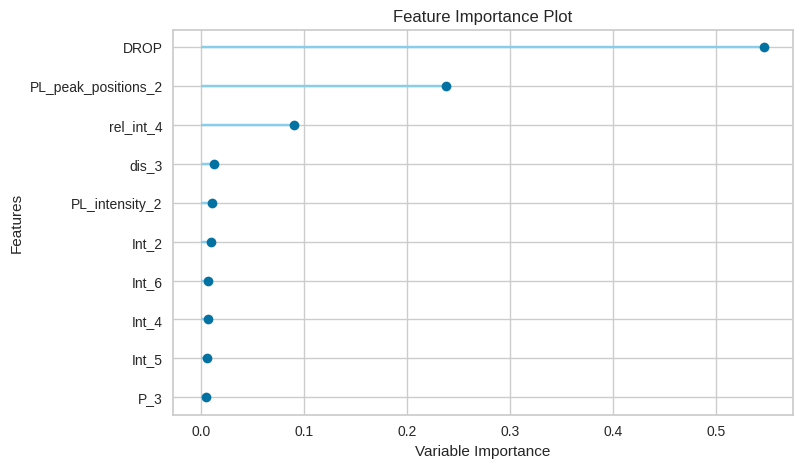

In [47]:
plot_model(gbr, plot = 'feature')



---



---



#Ordinal Encoding

⚡ get all features

In [69]:
from pycaret.regression import *
s = setup(data_encode, target = 'FF',  train_size = 0.8, session_id = 1543 ,fold=3,
          ignore_features=['Isc'],
          ordinal_features = {'DROP':['S','XS','M','L','XL','XXL']})

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 49)"
4,Transformed data shape,"(27, 53)"
5,Transformed train set shape,"(21, 53)"
6,Transformed test set shape,"(6, 53)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,46


In [70]:
best = compare_models(cross_validation= False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4909,0.5208,0.7217,0.9256,0.0156,0.0109,0.1200
xgboost,Extreme Gradient Boosting,0.8247,0.8838,0.9401,0.8737,0.0215,0.0190,0.1100
ada,AdaBoost Regressor,0.9018,1.0750,1.0368,0.8464,0.0245,0.0215,0.1300
rf,Random Forest Regressor,0.9881,1.4043,1.1850,0.7993,0.0278,0.0235,0.2500
ridge,Ridge Regression,1.2264,1.9020,1.3791,0.7282,0.0320,0.0289,0.0700
lr,Linear Regression,1.2914,2.0485,1.4312,0.7072,0.0324,0.0301,0.0800
dt,Decision Tree Regressor,1.1502,2.2055,1.4851,0.6848,0.0349,0.0270,0.1000
et,Extra Trees Regressor,1.3179,2.2538,1.5013,0.6779,0.0350,0.0306,0.2100
catboost,CatBoost Regressor,1.2851,2.6169,1.6177,0.6260,0.0384,0.0311,0.8400
omp,Orthogonal Matching Pursuit,1.4010,2.7254,1.6509,0.6105,0.0388,0.0335,0.0700


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [71]:
gbr = create_model('gbr',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4909,0.5208,0.7217,0.9256,0.0156,0.0109
Train,0.0690,0.0133,0.1155,0.9974,0.0025,0.0015


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

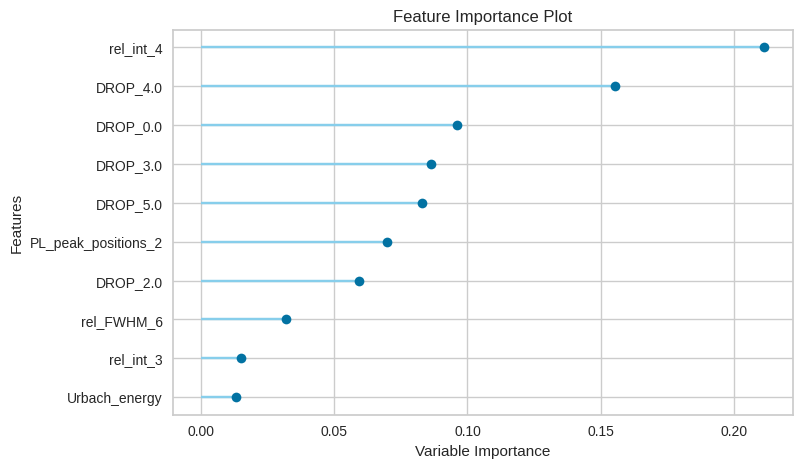

In [72]:
plot_model(gbr, plot = 'feature')



---



---



#Ordinal Encoding

**Target:** Isc

⚡ get all features

In [60]:
from pycaret.regression import *
s = setup(data_encode, target = 'Isc',  train_size = 0.8 ,fold=3,
          ignore_features=['FF'], session_id = 797,
          ordinal_features = {'DROP':['S','XS','M','L','XL','XXL']})

,Description,Value
0,Session id,797
1,Target,Isc
2,Target type,Regression
3,Original data shape,"(27, 49)"
4,Transformed data shape,"(27, 53)"
5,Transformed train set shape,"(21, 53)"
6,Transformed test set shape,"(6, 53)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,46


In [61]:
best = compare_models(cross_validation= False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.8221,21.3834,4.6242,0.9253,0.0126,0.0104,0.1200
huber,Huber Regressor,5.3621,41.2102,6.4195,0.8560,0.0174,0.0145,0.0900
lr,Linear Regression,6.8417,55.1629,7.4272,0.8072,0.0197,0.0182,0.0600
ridge,Ridge Regression,6.5249,58.1502,7.6256,0.7968,0.0207,0.0175,0.0900
lasso,Lasso Regression,7.4018,80.8190,8.9899,0.7176,0.0245,0.0200,0.1000
llar,Lasso Least Angle Regression,7.4044,80.8044,8.9891,0.7176,0.0245,0.0200,0.0700
en,Elastic Net,7.2847,110.9705,10.5343,0.6122,0.0288,0.0200,0.1000
omp,Orthogonal Matching Pursuit,9.8042,132.5045,11.5111,0.5370,0.0311,0.0263,0.0700
catboost,CatBoost Regressor,10.6016,138.5959,11.7727,0.5157,0.0316,0.0282,1.4900
rf,Random Forest Regressor,11.3643,152.4442,12.3468,0.4673,0.0329,0.0299,0.2500


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [62]:
gbr = create_model('gbr',return_train_score=True,cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,3.8221,21.3834,4.6242,0.9253,0.0126,0.0104
Train,0.8799,1.2563,1.1209,0.9976,0.0031,0.0024


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

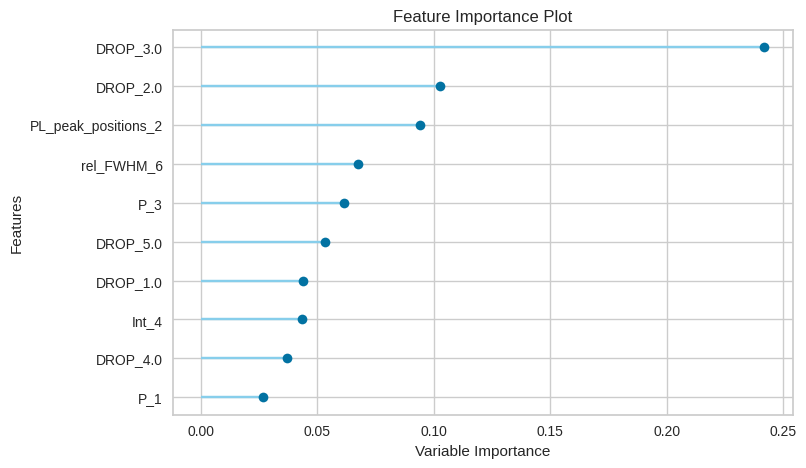

In [65]:
plot_model(gbr, plot = 'feature')